NameError: name 'np' is not defined

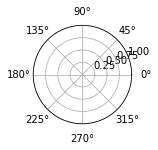

In [1]:
from matplotlib import pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(131, projection='polar')


# bg plot of zero data in a circle
bg_r = np.linspace(0, 1, 20) 
bg_a = np.linspace(0, 2*np.pi, 20)


bg_v = np.zeros((20,20))


ax.set_aspect('equal')
ax.axis('off')

ax.pcolormesh(bg_a, bg_r, bg_v,\
        shading='auto', vmin=0,vmax=1)

pos = ax.get_position()
print(pos)
pos.x0
pos.width

In [1]:
import optical_systems
import dipole_source
import numpy as np
from matplotlib import pyplot as plt
import sys
# %matplotlib widget

np.set_printoptions(threshold=sys.maxsize)

O1 = {'NA':1.2, 'n':1.33, 'f': 0.180/60, 'rotation':0}  # 60x
O2 = {'NA':0.95, 'n':1, 'f': 0.200/50, 'rotation':1}  # 50x
O3 = {'NA':1, 'n':1, 'f': 0.200/40}  # 40x
TL1 = {'NA':1, 'n':1, 'f': 0.180}
TL2 = {'NA':1, 'n':1, 'f': 0.160}
TL3 = {'NA':1, 'n':1, 'f': 0.162}

O1 = {'NA':1.2, 'n':1.33, 'f': 0.180/60}  # 60x
O2 = {'NA':0.95, 'n':1, 'f': 0.180/60}  # 50x
O3 = {'NA':1, 'n':1, 'f': 0.180/60}  # 40x
TL1 = {'NA':0.85, 'n':1, 'f': 0.180/60}
TL2 = {'NA':0.8, 'n':1, 'f': 0.180/60, 'rotation':0.001}
TL3 = {'NA':1, 'n':1, 'f': 0.180/60}

lenses = [O1, O2, O3, TL1, TL2, TL3]

lenses = [O1, TL1, TL2, O2]

lenses  = [O1, TL1, TL2, O2]

# lenses = [O1, TL1]

source = dipole_source.DipoleSource()
source.add_dipoles(0,0)
# source.generate_dipoles(400)
# source.classical_photoselection((0,0))
# TODO: automate the calculation of ray entrace angle etc
# source.get_rays(O1['NA']/O1['n'], O1['f'])

source_dict = {'name':'x-dipole', 'source':source}
output = optical_systems.objective_system(lenses, source_dict, processes=4, plot=True, title="400 random dipoles imaged by objective with photoselection")

detector = output.detector

rad = detector.ray_polar_radius
phi = detector.ray_phi

rad = rad.astype(float)
phi = phi.astype(float)
# print(rad)

x = rad*np.cos(phi)
y = rad*np.sin(phi)

# rays = detector.dipole_source.ray_list
# rays[0].ray_history

# plt.figure()
# plt.hist(phi, bins=50)
# plt.show()


# plt.figure(figsize=[10, 10])
# plt.scatter(x,y)
# plt.show()

## TRY FILLING TRI WITH ZEROS INSTEAD 


Generating 1 dipoles
Dipole: theta=0.0, phi_d=0.0
manual (cap method) area sum 3.5747497020476846
expected area sum 3.5738661731158983
N rays 583
Starting thetas [0.0 0.08447280093200145 0.08447280093200145 0.08447280093200145
 0.08447280093200145 0.08447280093200145 0.08447280093200145
 0.08447280093200145 0.1612080036019089 0.1612080036019089
 0.1612080036019089 0.1612080036019089 0.1612080036019089
 0.1612080036019089 0.1612080036019089 0.1612080036019089
 0.1612080036019089 0.1612080036019089 0.1612080036019089
 0.1612080036019089 0.23696444695469177 0.23696444695469177
 0.23696444695469177 0.23696444695469177 0.23696444695469177
 0.23696444695469177 0.23696444695469177 0.23696444695469177
 0.23696444695469177 0.23696444695469177 0.23696444695469177
 0.23696444695469177 0.23696444695469177 0.23696444695469177
 0.23696444695469177 0.23696444695469177 0.23696444695469177
 0.23696444695469177 0.23696444695469177 0.3141487279767524
 0.3141487279767524 0.3141487279767524 0.3141487279767

Time elapsed in parallel section (time.time()) 8.648943s
Rays lost = 454
Final ray count = 129
ending thetas [-3.4906586334917367e-05 -0.16891072678169894 -0.16892387168355505
 -0.1689534042880736 -0.16897708387769306 -0.16897708387769306
 -0.1689534042880736 -0.16892387168355505 -0.3223876898197479
 -0.32239947773857736 -0.3224165345247968 -0.32243428939905217
 -0.32244798520762735 -0.3224539528473349 -0.32245059372115903
 -0.322438807653911 -0.3224217520351734 -0.3224039964768186
 -0.32239029881666204 -0.3223843300094724 -0.47395514561741314
 -0.4739639800736444 -0.47397472663892665 -0.4739862206711569
 -0.4739972166050731 -0.4740065229321565 -0.4740131312888981
 -0.4740163256774217 -0.47401576000431433 -0.4740114955564873
 -0.474003994365077 -0.4739940691742872 -0.4739827954211907
 -0.4739713947423926 -0.47396110261162505 -0.473953034442963
 -0.47394806467538997 -0.4739467319598949 -0.47394918074628745
 -0.6287367027846996 -0.6287444494808815 -0.6287532002021472
 -0.6287623585748154

Exception: E_z is not zero in ray's frame!

In [1]:
1 >= 2

False